# Tarea 2: 

_Rodolfo Arturo González Trillo_


---

Se inicia cargando los paquetes que se usaran. `Interact` es un paquete de macros que, como su nombre lo dice, permite _interactividad_, y es justo por eso que se usa, para generar gráficos interactivos.

In [1]:
#Pkg.update()
#Pkg.add("Interact")

using PyPlot
using Interact


> 1) Consideren la función $ z_{n+1} = z_n^2 + c $ con `c = 0.12256484161600012 - 0.74486407104im`. Definan una malla de valores iniciales $z_0$ en el intervalo $[-1,1]\times [-1,1]$ (parte real $\times$ parte imaginaria).


Definimos la función _mapeo1D_, que hace a una función recursiva:

In [2]:
"""
    mapeo1D(F, x_0, N)

Hace ´N´ iterados de una función recursiva de la forma x_{n+1}=F(x_n), para un valor inicial ´x_0´.

"""

function mapeo1D(F, x_0, N)
    @assert N ≥ 1
    
    x = x_0
    for i in 1:N-1
        x = F(x)
    end
    
    x

end

mapeo1D


Usando como referencia la estructura para generar matrices de la función `compute_complex_roots` del notebook 04, pero se cambia la parte del metodo de Newton, se define la función `complex_matrix`:

In [3]:
"""
complex_matrix(f, range)

Está función genera una matriz con los valores z en el rango de una función 
en una matriz cuadrada compleja.

"""

function complex_matrix(f::Function, range::Range)
    
    L = length(range)
    
    # Se define una matriz cuadrada con todos los elementos cero, que más tarde 
    # será llenada conlos valores del cálculo que realizaremos.
    matriz = zeros(Complex{Float64},L,L)
    
        for (j, x) in enumerate(range)
        for (i, y) in enumerate(range)
            
            z = x + y*im
            
            matriz[i,j] = f(z)
            
        end
    end
    
    matriz
end

complex_matrix

Ahora, se define la función recursiva $ F(z)= z^2 + c $, con la $c$ dada en el cuerpo del problema:

In [4]:
F(z)=z^2-0.123 + 0.745im

F (generic function with 1 method)

> - ¿Cuantos valores finitos distintos (en el intervalo $[-1,1]\times [-1,1]$) se pueden obtener después de un gran número de iteraciones?

Ésto se puede verificar con las dos funciones previamente definidas, insertando un valor alto de `N`, el número de iteraciones:

> - Usando un color distinto para cada uno, grafiquen en el plano $\textrm{Re}(z) - \textrm{Im}(z)$ el conjunto obtenido.

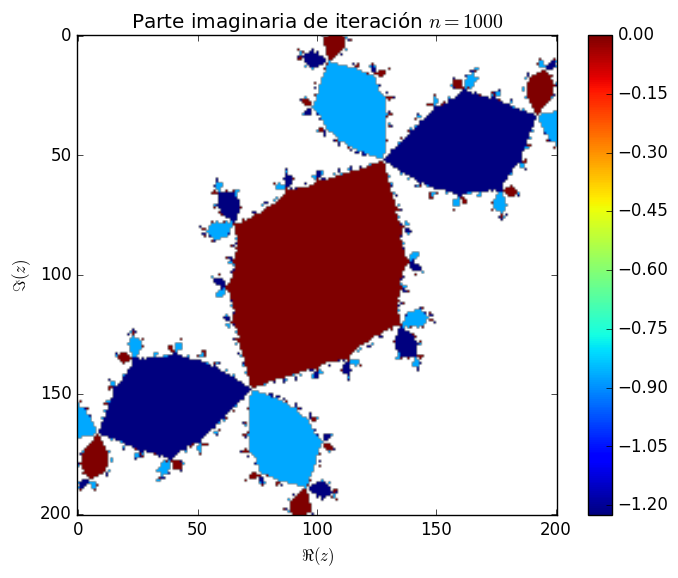

In [5]:
m_valores = complex_matrix( z -> mapeo1D(F, z, 1000), -1//1: 1//100 :1//1 )
imshow(real(m_valores)-imag(m_valores))

xlabel(L"\Re(z)")
ylabel(L"\Im(z)")
colorbar()
title(L"Parte imaginaria de iteración $n=1000$")
show()

Se observa que hay zonas con valores menores que otras bien definidas, y se difuminan en una zona con NaN.

2) Usando la función `compute_roots` vista en clase, o en alguna variación propuesta por ustedes, definan (en Julia) el mapeo

\begin{equation}
x_{n+1} = B(x_{n}) = 2x_n \mod 1.
\end{equation}

*Hint: Sean imaginos y no se conformen*

- Obtengas los puntos fijos de este mapeo numéricamente. Los puntos fijos del mapeo son aquéllos que se mapean en si mismos, es decir, $x_{n} = B(x_{n})$. Este cálculo se puede hacer a mano, lo que debe usarse para comprobar que la implementación numérica funciona bien.

La función `compute_roots`, del Notebook 4 aplica el método de Newton que requiere la función y su derivada.

In [6]:
"""
    compute_roots(f, f´,initial_conditions)

Calcula las raíces mediante método de newton de una función `f` y su derivada `f'`, dadas unas
condiciones iniciales `initial_conditions` de tipo `Range`.
"""

function compute_roots(f, f´, initial_conditions)
    roots = similar(initial_conditions)

    for (j, x_0) in enumerate(initial_conditions)
        x = x_0

        # 500 iterations of Newton's method
        for i in 1:500
            x = x - f(x) / f´(x)
        end

        roots[j] = x
    end
    
    roots
end

compute_roots

Definimos $B(x_{n}) = 2x_n \mod 1.$

In [7]:
B(x)=mod((2*x),1)

B (generic function with 1 method)

Graficamos la función para observar su comportamiento, junto con la función identidad para identificar los puntos que cumplen con la condición $x=B(x)$

Interact.Slider{Int64}(Signal{Int64}(10, nactions=0),"n",10,1:20,"d",true)

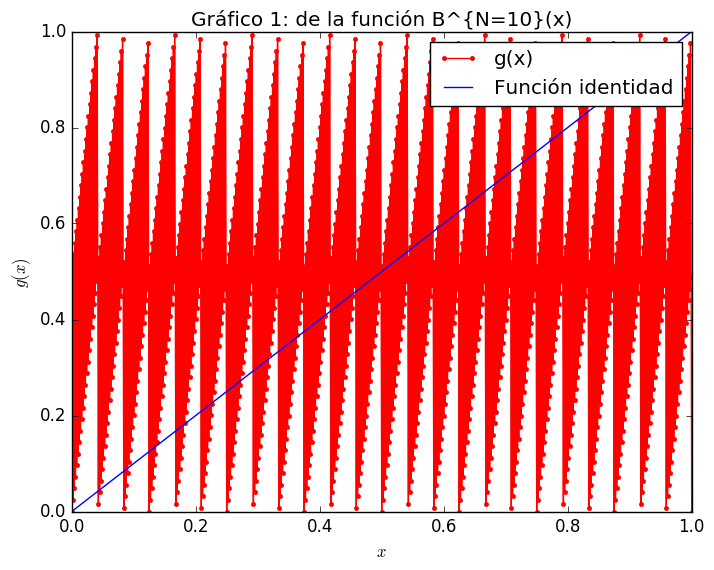

In [8]:
fig = figure()

@manipulate for n in 1:20

    xs = 0:0.001:1
    gs = zeros(length(xs))

    for (j,x) in enumerate(xs)
        gs[j] = mapeo1D(B,x,n)
    end

    withfig(fig) do
        plot(collect(xs),gs,"r.-", label="g(x)")
        plot(collect(xs),collect(xs),label="Función identidad")

        title("Gráfico 1: de la función B^{N=$n}(x)")
        xlabel(L"$x$")
        ylabel(L"$g(x)$")
        legend()
        
    end
end

Ahora, graficamos al revés, para ver si el a cierto valor de $N$, la solución converge:

Se utiliza la derivada númerica, de la forma:

$$ f'(x)\approx \frac{f(x+h)-f(x-h)}{2h}$$

Debido a que la derivación de la función módulo no es trivial, aunque mantiene la pendiente, produce funciones delta cada cierto intervalo.

In [9]:
"""
    numder(f,x)

Calcula la derivida númerica de una función `f` en un punto `x`, con la defini-
ción de derivada, con `h=0.5e-07`.
"""

function numder(f,x)
    h = 1e-07
    
    (f(x+h)-f(x-h))/(2*h)
    
end


numder

Para poder encontrar los puntos fijos numericamente, con la función ´compute_roots´ se usa la función.

$$B_{roots}(x)=B^n(x)-x$$

y su derivada númerica $B_{roots}'$

In [10]:
n=14           #Valor de N.

Broots(x) = mapeo1D(B,x,n) - x
Broots´(x) = numder(Broots,x)


Broots´ (generic function with 1 method)

Se calculan las raíces con la función, y obtenemos los posibles puntos fijos.  Es conveniente dividir el intervalo en $2^{n-1}$ partes, debido a que es el número de raíces. Esta conclusión se obtiene de ver el gráfico 2 y cambiar el valor de n.

In [11]:
n=3
compute_roots(Broots, Broots´, 0:1/2^(n-1):1)

5-element Array{Float64,1}:
 0.0     
 0.333333
 0.333333
 0.666667
 1.0     

In [12]:
n=7
compute_roots(Broots, Broots´, 0:1/2^(n-1):1)

65-element Array{Float64,1}:
 0.0      
 0.015873 
 0.031746 
 0.047619 
 0.0634921
 0.0793651
 0.0952381
 0.111111 
 0.126984 
 0.142857 
 0.15873  
 0.174603 
 0.190476 
 ⋮        
 0.825397 
 0.84127  
 0.857143 
 0.873016 
 0.888889 
 0.904762 
 0.920635 
 0.936508 
 0.952381 
 0.968254 
 0.984127 
 1.0      

Observamos que sin importar el valor de $n$, el 0 y el 1 son los únicos puntos que permanecen en la intersección con la función identidad. El análisis del 0 se realiza en la siguiente sección. Para el 1:

In [13]:
[mapeo1D(B, 1.0, n) for n in 1:10]

10-element Array{Float64,1}:
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

Obsevamos que el punto no es estable, por lo que no es punto fijo.

- Pensando en que la estabilidad de un punto fijo es el comportamiento que se observa de los iterados (a priori un número infinito) al considerar pequeñas desviaciones del punto fijo, ¿cuál es la estabilidad de los puntos fijos que se obtiene *numéricamente*, digamos, después de 100 iteraciones? ¿Pueden encontrar una explicación analítica de la observación numérica?

Primero, evaluamos en 0, para distintas N's.

In [14]:
[mapeo1D(B, 0, n) for n in 1:10]

10-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

Evaluemos cerca del 0.

In [15]:
[mapeo1D(B, 0.1, n) for n in 1:10]

10-element Array{Float64,1}:
 0.1
 0.2
 0.4
 0.8
 0.6
 0.2
 0.4
 0.8
 0.6
 0.2

In [16]:
[mapeo1D(B, 0.001, n) for n in 1:10]

10-element Array{Float64,1}:
 0.001
 0.002
 0.004
 0.008
 0.016
 0.032
 0.064
 0.128
 0.256
 0.512

Observamos que la solución nunca se acerca a cero, entonces es un punto inestable. Sin embargo, para $N=100$

In [17]:
[mapeo1D(B, 0.001, n) for n in 1:100]

100-element Array{Float64,1}:
 0.001
 0.002
 0.004
 0.008
 0.016
 0.032
 0.064
 0.128
 0.256
 0.512
 0.024
 0.048
 0.096
 ⋮    
 0.0  
 0.0  
 0.0  
 0.0  
 0.0  
 0.0  
 0.0  
 0.0  
 0.0  
 0.0  
 0.0  
 0.0  

¡De algún modo la solución se va a 0.0 después de mostrar inestabilidad!

Graficamos ahora fijando la x y cambiando la n:

Interact.Slider{Float64}(Signal{Float64}(0.5, nactions=0),"x",0.5,0.0:0.05:1.0,".3f",true)

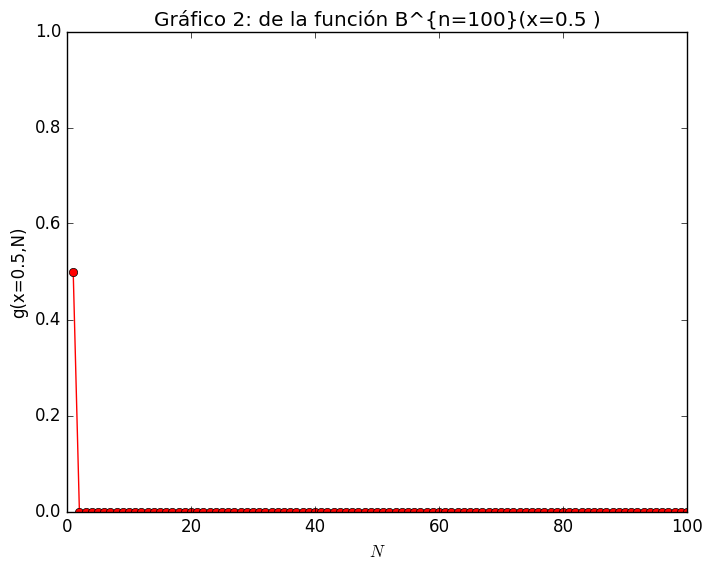

In [18]:
fig = figure()
@manipulate for x in 0:0.05:1        
    Ns = 1:1:100
    gs = zeros(length(Ns))

    for (j,n) in enumerate(Ns)

        gs[j] = mapeo1D(B,x,n)
    end

    withfig(fig) do
        plot(collect(Ns),gs,"ro-")

        title("Gráfico 2: de la función B^{n=$n}(x=$x )")
        xlabel(L"$N$")
        ylabel("g(x=$x,N)")
        ylim(0,1)
        legend()
    end
    
end

Observamos que en el intervalo, para $N$ grande, el valor de todos los puntos tiende a 0. Entonces no es un problema de estabilidad del punto fijo, es un problema del cálculo. Esto se debe a como la computadora realiza el cálculo de multiplicación por 2, recorriendo solo el punto hasta que finalmente la memoria se queda vacía. Si hacemos la función en racionales, observamos que esto no ocurre.

In [19]:
[mapeo1D(B, 1//100, n) for n in 1:100]

100-element Array{Rational{Int64},1}:
  1//100
  1//50 
  1//25 
  2//25 
  4//25 
  8//25 
 16//25 
  7//25 
 14//25 
  3//25 
  6//25 
 12//25 
 24//25 
   ⋮    
 14//25 
  3//25 
  6//25 
 12//25 
 24//25 
 23//25 
 21//25 
 17//25 
  9//25 
 18//25 
 11//25 
 22//25 

Interact.Slider{Int64}(Signal{Int64}(50, nactions=0),"num",50,1:1:100,"d",true)

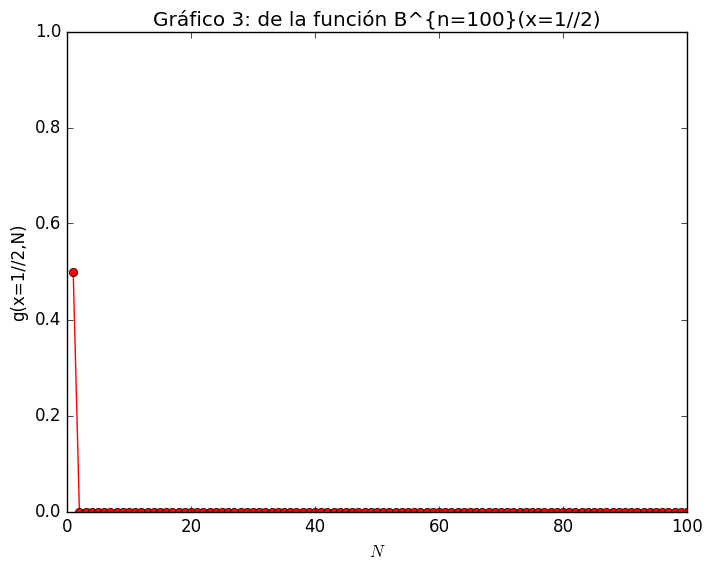

In [20]:
fig = figure()
@manipulate for num in 1:1:100        
    Ns = 1:1:100
    gs = zeros(length(Ns))
    
    x=num//100

    for (j,n) in enumerate(Ns)
        
        gs[j] = mapeo1D(B,x,n)
    end

    withfig(fig) do
        plot(collect(Ns),gs,"ro-")

        title("Gráfico 3: de la función B^{n=$n}(x=$x)")
        xlabel(L"$N$")
        ylim(0,1)
        ylabel("g(x=$x,N)")
        legend()
    end
    
end